# Prey predator model 

Equations: <br>
dx/dt = ayx - bx <br>
dy/dt = cy - dxy <br>
Where typically <br>
a = 3 * 10^(-5) <br>
b = 2 * 10^(-2) <br>
c = 3 * 10^(-2) <br>
d = 2 * 10^(-4) <br>
x and y are functions of t - time in years. <br>
x(t) - wolfs number in t. <br>
y(t) - rabbits number in t. <br>
x(0) = 100 <br>
y(0) = 1000 <br>


In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)


In [5]:
tmax = 1000
t0 = 0
x0 = 100
y0 = 1000
a = 0.00003
b = 0.02
c = 0.03
d = 0.0002

x = list()
y = list()
x.append(x0)
y.append(y0)

for i in range(1, tmax):
    x.append( (x[i-1] + a * y[i-1] * x[i-1] - b * x[i-1]))
    y.append( (y[i-1] + c * y[i-1] - d * x[i-1] * y[i-1]))



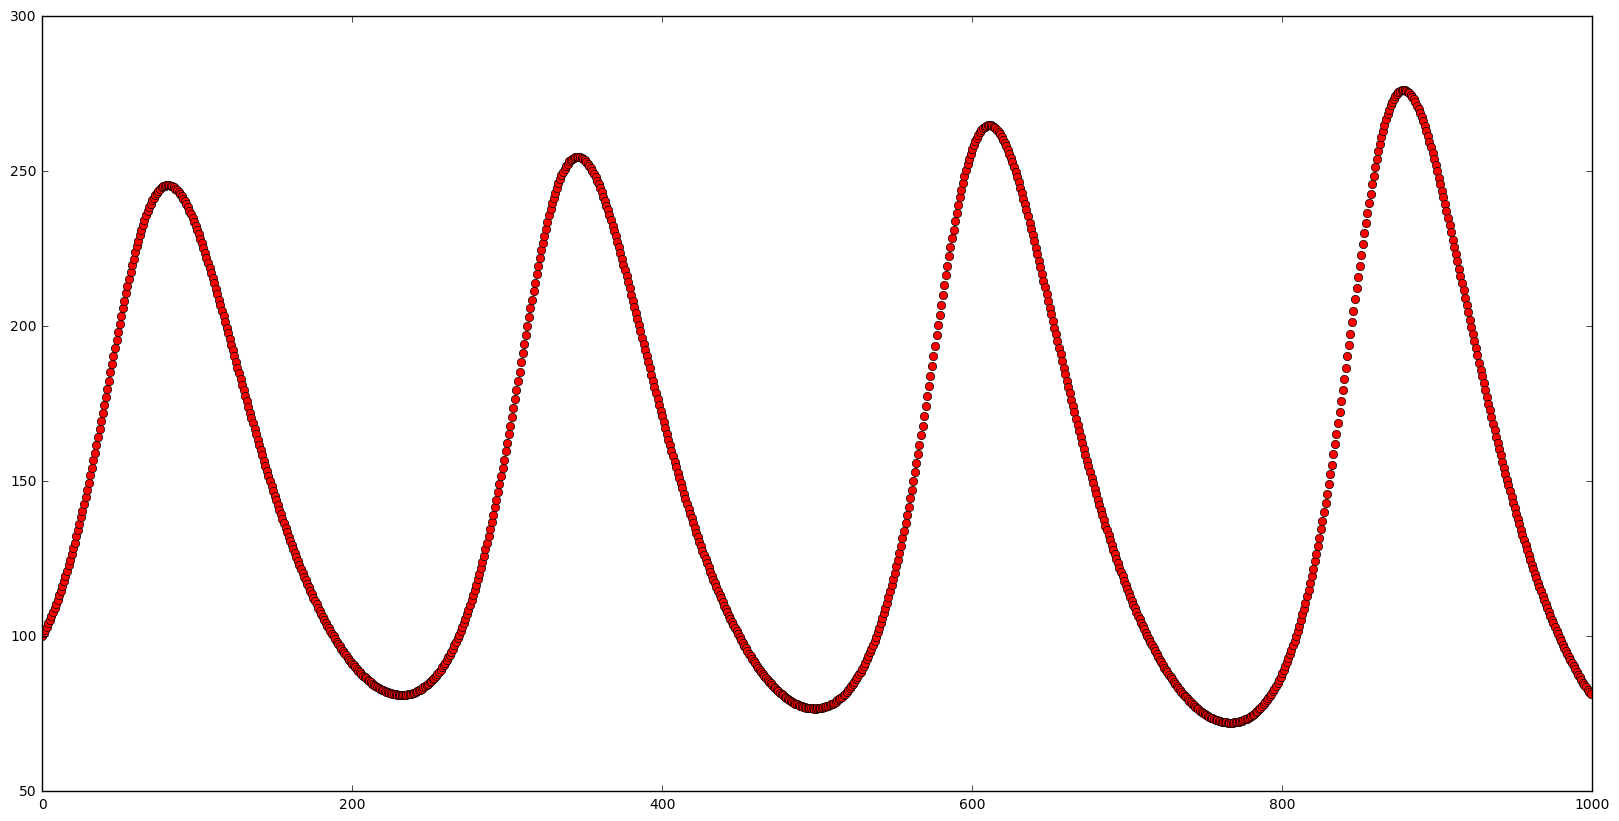

In [6]:
plt.plot(range(0, tmax), x, 'ro')
plt.show()

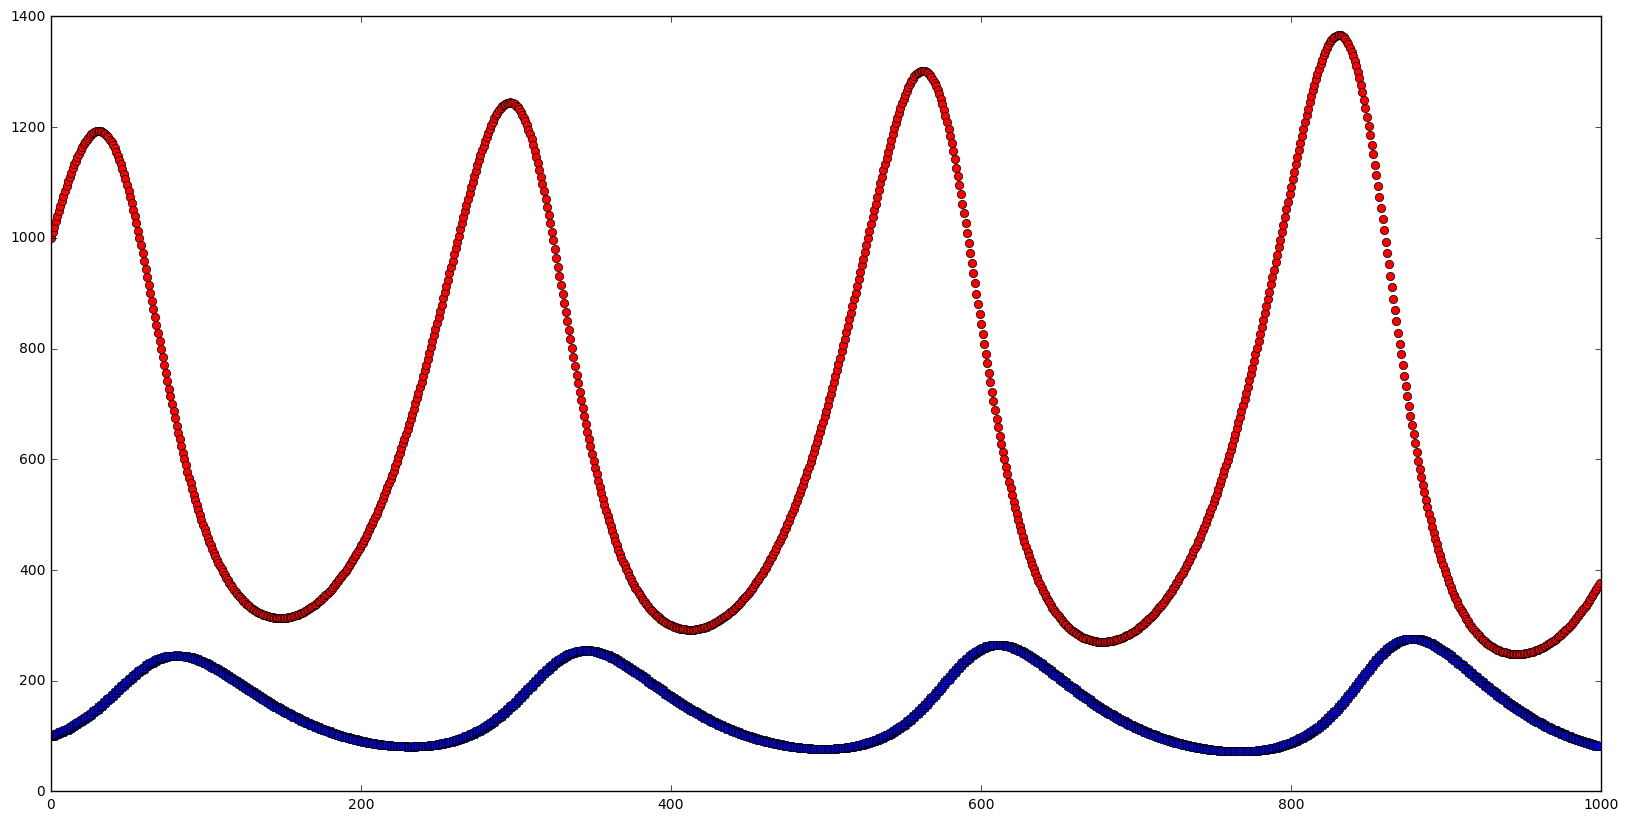

In [7]:
plt.plot(range(0, tmax), y, 'ro', range(0, tmax), x, 'bs')
plt.show()

At above graphs, we can see that number of rabbits (red points) and number of wolfs (blue points) is cyclic. It isn't exactly the same chart as in paper. It suggest, that there is some problem with parameters or rounding values. If we try round number of wolfs and rabbits it seems to work much better. 

# HANDY model 

The population is divided between two variables xc (Commoners) and xe (Elites). There are two rates β (birth rate - constant) and α (death rate - depends on wealth). Model assumes natural resources represented by y and accumulated wealth represented by w. 

\begin{aligned}
\begin{cases}
\frac{\partial x_{C}}{\partial t}  = β_{C}x_{C} - α_{C}x_{C} \\
\frac{\partial x_{E}}{\partial t} = β_{E}x_{E} - α_{E}x_{E}\\
\frac{\partial y}{\partial t} = γy(λ−y) - δx_{C}y \\
\frac{\partial w}{\partial t} = δx_{C}y - C_{C} - C_{E} \\
\end{cases}
\end{aligned}

\begin{aligned}
\begin{cases}
C_{C} = min(1, \frac{w}{w_{th}})sx_{C} \\
C_{E} = min(1, \frac{w}{w_{th}})κsx_{E} \\
\end{cases}
\end{aligned}

\begin{aligned}
\begin{cases}
α_{C} = α_{m} + max(0, 1 - \frac{C_{C}}{sx_{C}})(α_{M} - α_{m}) \\
α_{E} = α_{m} + max(0, 1 - \frac{C_{E}}{sx_{E}})(α_{M} - α_{m}) \\
\end{cases}
\end{aligned}

\begin{aligned}
w_{th} = ρx_{C} + κρx_{E}
\end{aligned}

\begin{aligned}
Constants\ and\ their\ typical\ values \\
α_{m} \quad Normal\ (minimum)\ death\ rate \quad => \quad 0.01 \\
α_{M} \quad Famine\ (maximum)\ death\ rate \quad => \quad 0.07 \\
β_{C} \quad Commoner\ birth\ rate \quad => \quad 0.03 \\
β_{E} \quad Elite\ birth\ rate \quad => \quad 0.03 \\
s \quad Salary\ per\ capita \quad => \quad 0.0005 \\
ρ \quad Threshold\ wealth\ per\ capita \quad => \quad 0.005 \\
γ \quad Nature\ regeneration\ rate \quad => \quad 0.01 \\
λ \quad Nature\ carring\ capacity \quad => \quad 100 \\
κ \quad Inequality\ factor\quad => \quad 1, 10, 100 \\
δ \quad Depletion\ factor\quad => \quad None \\
\end{aligned}

\begin{aligned}
Variables\ and\ their\ initial\ values \\
x_{C} \quad Commoner\ population\quad => \quad 100 \\
x_{E} \quad Elite\ population\quad => \quad 0, 1, 25 \\
y \quad Nature\quad => \quad  λ\\
w \quad Accumulated\ wealth\quad => \quad 0 \\
\end{aligned}

Using above equations and constants, we implemented function which returns simulation result.

In [25]:
class SimulationResult:
    def __init__(self, tmax, commoner_population_result, elite_population_result, nature_result, wealth_result):
        self.tmax = tmax
        self.commoner_population_result = commoner_population_result
        self.elite_population_result = elite_population_result
        self.nature_result = nature_result
        self.wealth_result = wealth_result
    
    def show_commoner_population(self):
        plt.yticks(np.arange(0, max(self.commoner_population_result), 4000))
        legend = mpatches.Patch(color='green', label='Commoner_population(time)')
        plt.legend(handles=[legend])
        plt.plot(range(0, self.tmax), self.commoner_population_result, 'go')
        plt.grid()
        plt.show()
        
    def show_elite_population(self):
        plt.yticks(np.arange(0, max(self.elite_population_result), 400))
        legend = mpatches.Patch(color='green', label='Elite_population(time)')
        plt.legend(handles=[legend])
        plt.plot(range(0, self.tmax), self.elite_population_result, 'go')
        plt.grid()
        plt.show()
        
    def show_nature(self):
        plt.yticks(np.arange(0, nature_carring_capacity, 1))
        legend = mpatches.Patch(color='green', label='Nature(time)')
        plt.legend(handles=[legend])
        plt.plot(range(0, self.tmax), self.nature_result, 'go')
        plt.grid()
        plt.show()
        
    def show_wealth(self):
        plt.yticks(np.arange(0, max(self.wealth_result), 10))
        legend = mpatches.Patch(color='green', label='Wealth(time)')
        plt.legend(handles=[legend])
        plt.plot(range(0, self.tmax), self.wealth_result, 'go')
        plt.grid()
        plt.show()
        

#constants
normal_death_rate = 0.01
famine_death_rate = 0.07
commoner_birth_rate = 0.03
elite_birth_rate = 0.03
salary_per_capita = 0.0005
threshold_wealth_per_capita = 0.005
nature_regeneration_rate = 0.01
nature_carring_capacity = 100
inequality_factor = [1, 10, 100]

#variables initial values
commoner_population_initial = 100
elite_population_initial = [0,  1, 25]
nature_initial = nature_carring_capacity
accumulated_wealth_initial = 0

#I have no idea how can I calculate this value, so I set something randomly.
elite_to_commoner_equilibrium_ratio = 0.6 


helper_parameter = (famine_death_rate - commoner_birth_rate) / (famine_death_rate - normal_death_rate)

def egalitarian_optimal_depletion_factor():
    return (2 *  helper_parameter * salary_per_capita)/ nature_carring_capacity

def equitable_optimal_depletion_factor(elite_scenario):
    helper = (1 + elite_population_initial[elite_scenario] / commoner_population_initial)
    return ((2 * helper_parameter * salary_per_capita)/ nature_carring_capacity) * helper
    
def unequal_optimal_depletion_factor(elite_scenario, equality_scenario):
    helper = (1 + inequality_factor[equality_scenario] * elite_to_commoner_equilibrium_ratio)
    return ((2 * helper_parameter * salary_per_capita)/ nature_carring_capacity) * helper

def depletion_factor(equality_scenario, elite_scenario, depletion_modifier):
    depletion_helper = 0
    if equality_scenario == 0:
        depletion_helper = egalitarian_optimal_depletion_factor()
    elif equality_scenario == 1:
        depletion_helper = equitable_optimal_depletion_factor(elite_scenario)
    else:
        equality_helper = unequal_optimal_depletion_factor(elite_scenario, equality_scenario)
    return depletion_helper * depletion_modifier

def wealth_threshold(actual_commoner_population, actual_elite_population, equality_scenario):
    commoner_helper = threshold_wealth_per_capita * actual_commoner_population
    elite_helper = inequality_factor[equality_scenario] * threshold_wealth_per_capita * actual_elite_population 
    return  commoner_helper + elite_helper 

def commoners_consumption_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario):
    wealth_threshold_helper = wealth_threshold(actual_commoner_population, actual_elite_population, equality_scenario)
    return min(1, actual_wealth / wealth_threshold_helper) * salary_per_capita * actual_commoner_population

def elite_consumption_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario):
    wealth_threshold_helper = wealth_threshold(actual_commoner_population, actual_elite_population, equality_scenario)
    helper = inequality_factor[equality_scenario] * salary_per_capita * actual_elite_population
    return min(1, actual_wealth / wealth_threshold_helper) * helper

def commoner_death_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario):
    commoners_consumption_rate_helper = commoners_consumption_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
    helper = max(0, 1 - commoners_consumption_rate_helper / (salary_per_capita * actual_commoner_population))
    return normal_death_rate + helper * (famine_death_rate - normal_death_rate)
     
def elite_death_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario):
    elite_consumption_rate_helper = elite_consumption_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
    helper = 0
    if actual_elite_population != 0:
        helper = max(0, 1 - elite_consumption_rate_helper / (salary_per_capita * actual_elite_population))
    return normal_death_rate + helper * (famine_death_rate - normal_death_rate)

#Derivative definitions
def commoner_population(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario):
    commoner_death_rate_helper = commoner_death_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
    return commoner_birth_rate * actual_commoner_population - commoner_death_rate_helper * actual_commoner_population;

def elite_population(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario):
    elite_death_rate_helper = elite_death_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
    return elite_birth_rate * actual_elite_population - elite_death_rate_helper * actual_elite_population;

def nature(actual_nature, actual_commoner_population, elite_scenario, equality_scenario, depletion_modifier):
    regeneration_helper = nature_regeneration_rate * actual_nature * (nature_carring_capacity - actual_nature)
    return regeneration_helper - depletion_factor(equality_scenario, elite_scenario, depletion_modifier) * actual_commoner_population * actual_nature

def wealth(actual_wealth, actual_commoner_population, actual_elite_population, actual_nature, elite_scenario, equality_scenario, depletion_modifier):
    depletion_factor_helper = depletion_factor(equality_scenario, elite_scenario, depletion_modifier)
    commoners_consumption_rate_helper = commoners_consumption_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
    elite_consumption_rate_helper = elite_consumption_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
    return depletion_factor_helper * actual_commoner_population * actual_nature - commoners_consumption_rate_helper - elite_consumption_rate_helper


        

def simulate(elite_scenario, equality_scenario, tmax, depletion_modifier):
    #preparing simulation

    commoner_population_result = list()
    elite_population_result = list()
    nature_result = list()
    wealth_result = list()

    commoner_population_result.append(commoner_population_initial)
    elite_population_result.append(elite_population_initial[elite_scenario])
    nature_result.append(nature_initial)
    wealth_result.append(accumulated_wealth_initial)

    #simulation loop
    for i in range(1, tmax):
        actual_commoner_population = commoner_population_result[i-1]
        actual_elite_population = elite_population_result[i-1]
        actual_nature = nature_result[i-1]
        actual_wealth = wealth_result[i-1]

        commoner_population_helper = commoner_population(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
        elite_population_helper = elite_population(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
        nature_helper = nature(actual_nature, actual_commoner_population, elite_scenario, equality_scenario, depletion_modifier)
        wealth_helper = wealth(actual_wealth, actual_commoner_population, actual_elite_population, actual_nature, elite_scenario, equality_scenario, depletion_modifier)

        commoner_population_result.append(actual_commoner_population + commoner_population_helper)
        elite_population_result.append(actual_elite_population + elite_population_helper)
        nature_result.append(actual_nature + nature_helper)
        wealth_result.append(actual_wealth + wealth_helper)


    #show results
    result = SimulationResult(tmax, commoner_population_result, elite_population_result, nature_result, wealth_result)
    result.show_commoner_population()
    result.show_elite_population()
    result.show_nature()
    result.show_wealth()


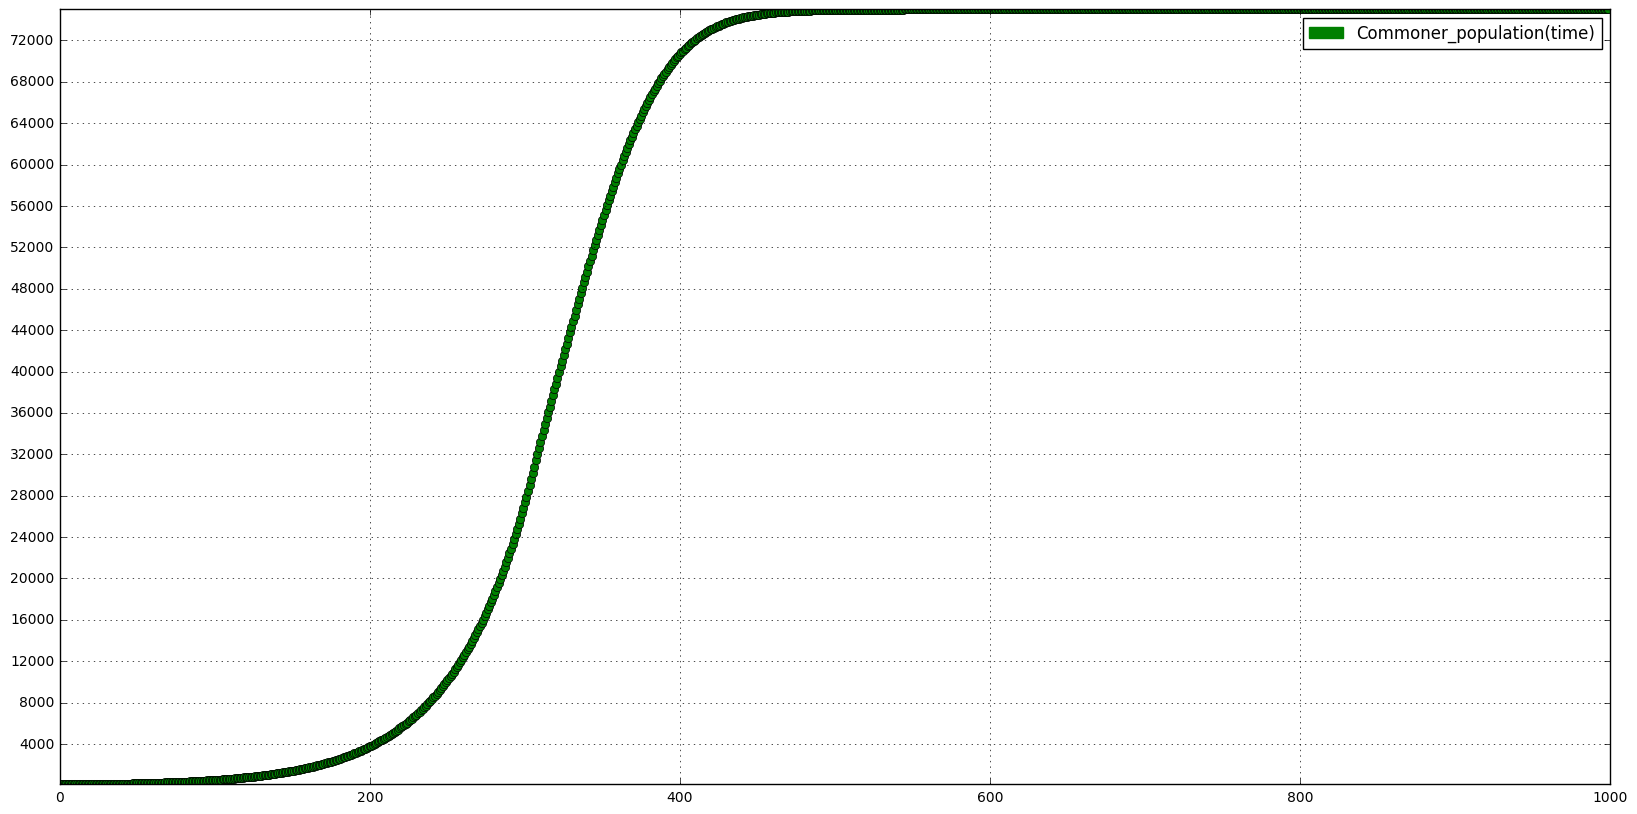

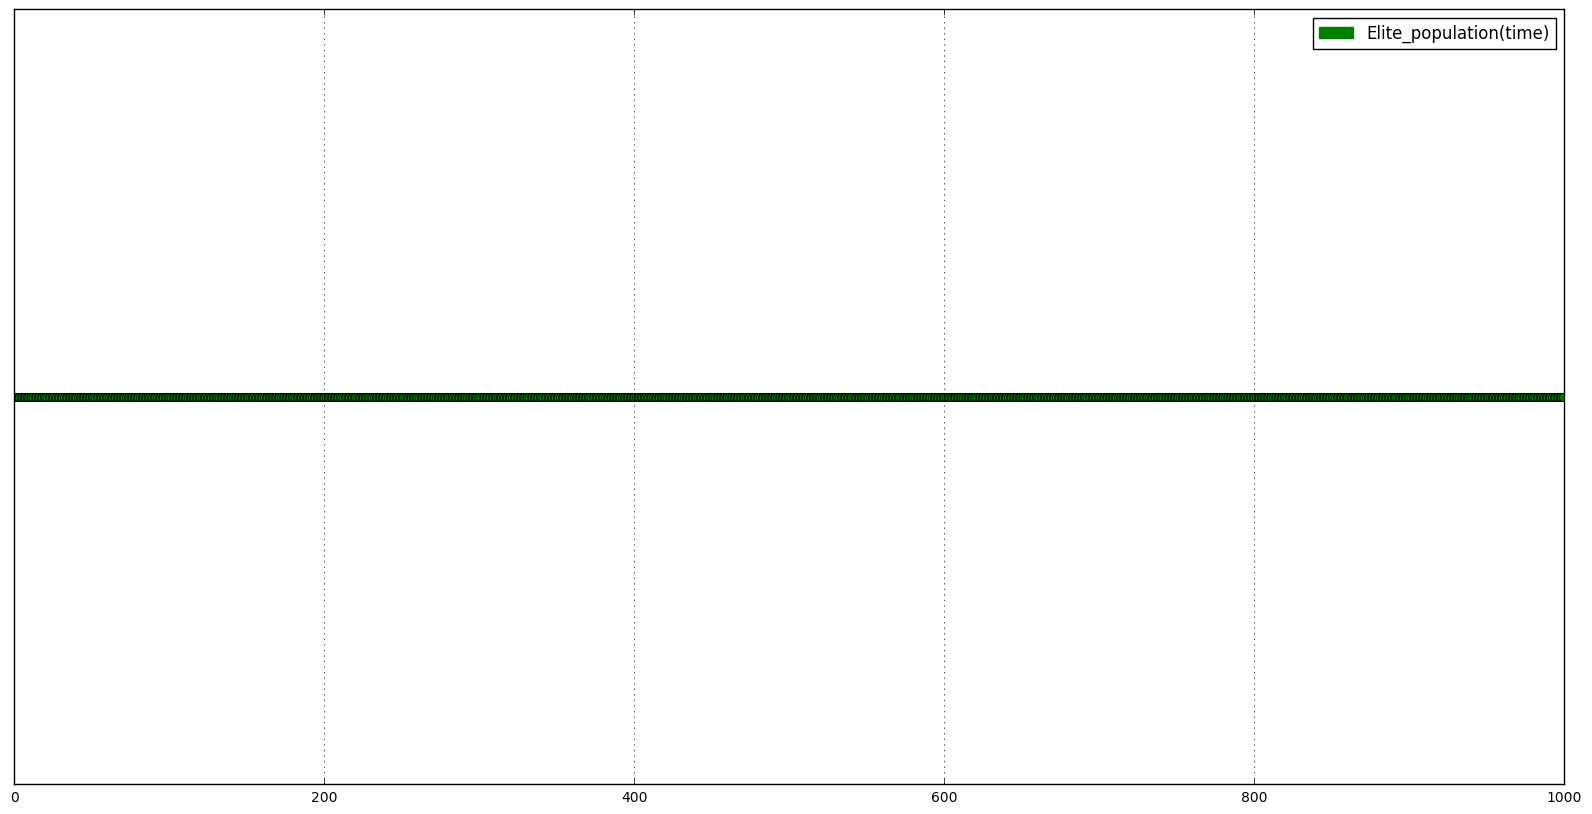

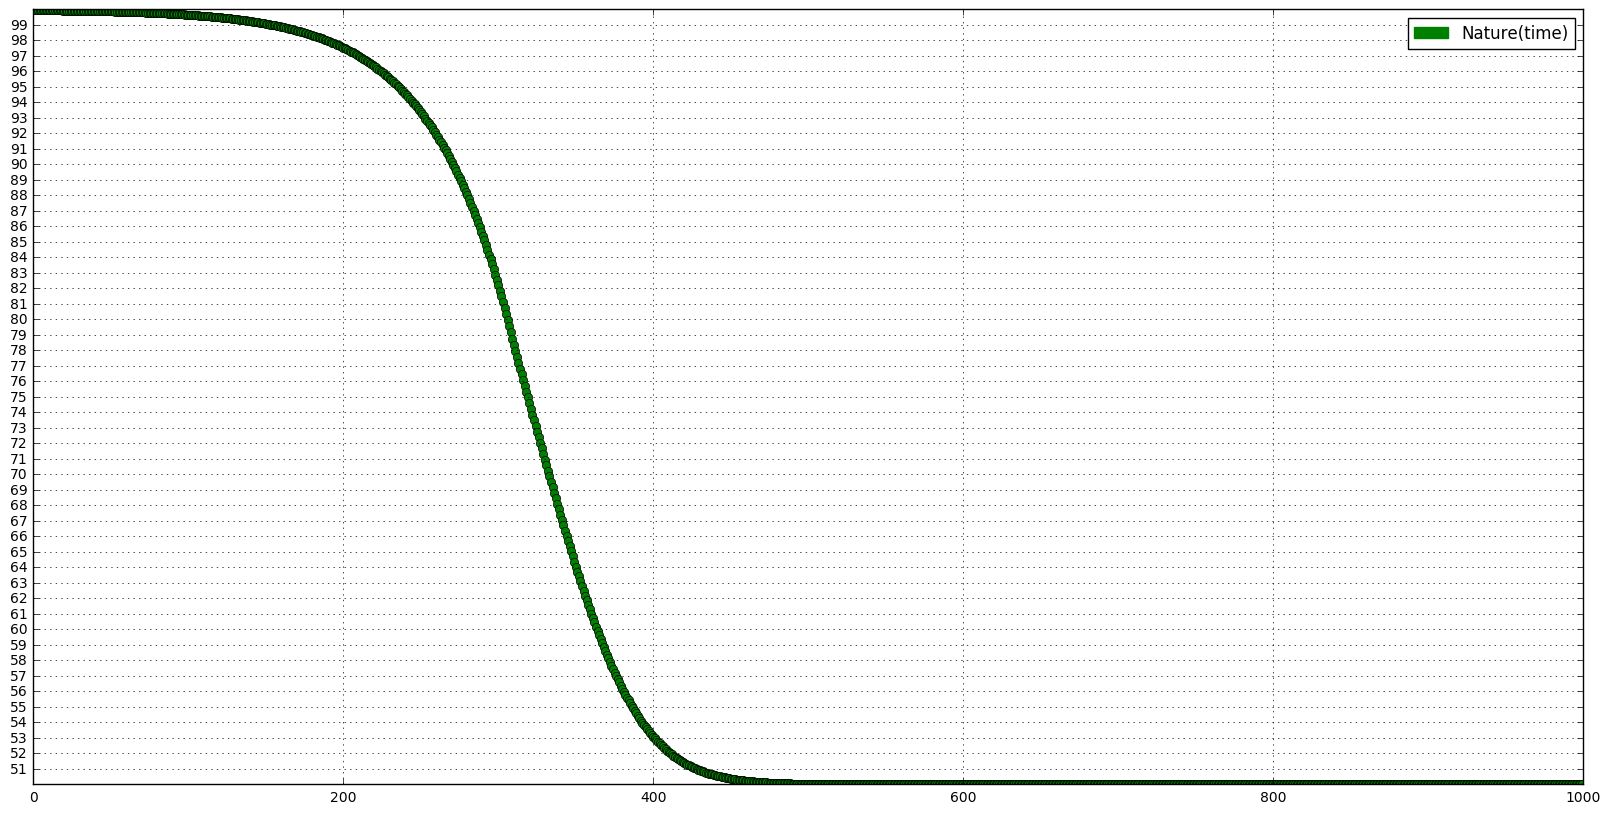

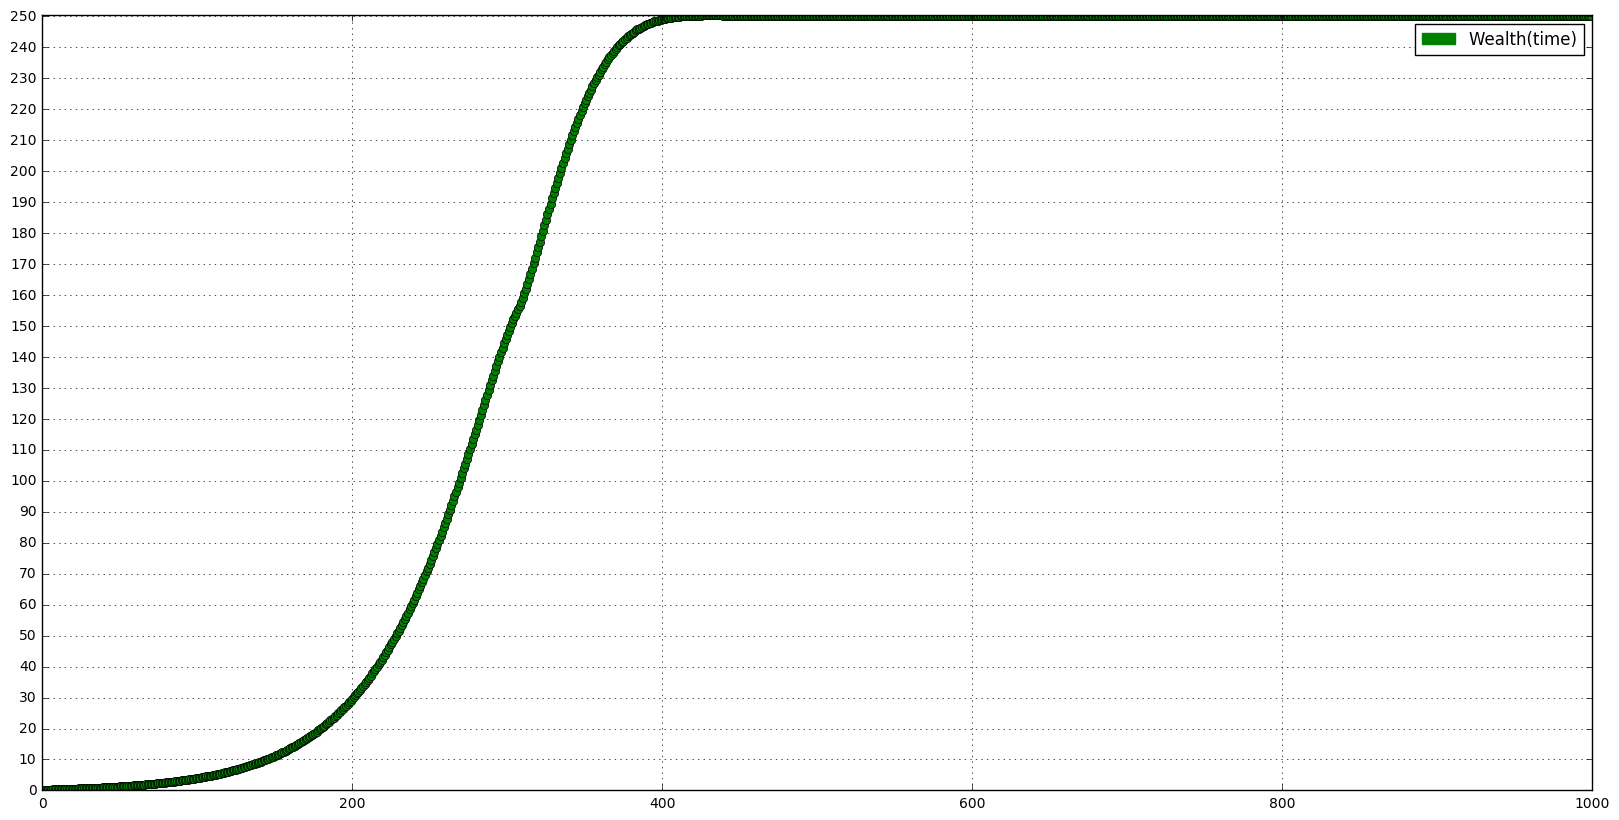

In [31]:
simulate(elite_scenario = 0, equality_scenario = 0, tmax = 1000, depletion_modifier = 1)